# EDA Student Performance Indiacator

1) Problem Statement
 - This project understands how the students performance(test scores) is affected by other variables such as gender,
    ethinicity, parental level of eductaion, lunch, Test preparation course.

2) Data Collection
- Dataset Source :- httsp://www.kaggle.com/dataset/spscientist/student-performance-in-exams?datasetId=74977
- The data consist of 8 columns and 1000 rows

3) Dataset Information
- gender : sex of students -> (Male/Female)
- race/ethinicity: ethinicity of students -> (Group A,B,C,D)
- parental level of eductaion: parents final eductaion -> (bachelor's degree, some college, masters degree, associate's degree,
                                                          high school)
- lunch : having lunvh before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- maths score
- reading score
- writing score


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset
df = pd.read_csv('exams.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group D,some high school,free/reduced,completed,42,45,44
1,male,group C,some high school,standard,none,71,77,76
2,male,group E,some high school,standard,completed,80,66,69
3,male,group D,associate's degree,free/reduced,none,68,59,55
4,female,group C,some high school,standard,none,44,45,43


In [3]:
df.shape

(1000, 8)

3. Data Checks to Perform

- Check Missing Values
- Check Duplicate Values
- Check Datatype
- Check the number of unique values of each column
- Check statistics of dataset
- Check the varuious categories present in the different categorical columns

In [4]:
# check missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Insights or Observtion

There are no missing values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
## Check Duplicates
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace = True)

In [10]:
df.duplicated().sum()

0

There are no duplicates values in the dataset

In [11]:
## check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       999 non-null    object
 1   race/ethnicity               999 non-null    object
 2   parental level of education  999 non-null    object
 3   lunch                        999 non-null    object
 4   test preparation course      999 non-null    object
 5   math score                   999 non-null    int64 
 6   reading score                999 non-null    int64 
 7   writing score                999 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 70.2+ KB


In [13]:
## Checking the number of unique values of each columns
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     79
reading score                  73
writing score                  77
dtype: int64

In [14]:
## Check the statistics of the dataset
df.describe()

,math score,reading score,writing score
count,999.000000,999.000000,999.000000
mean,66.536537,69.000000,67.909910
std,15.353562,14.746217,15.362158
min,9.000000,19.000000,22.000000
25%,55.000000,59.000000,57.000000
50%,67.000000,69.000000,68.000000
75%,78.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


# Insights or Observations

- From the above description of numerical data, all means are very close to each other  - between 66 and 69
- All the standard deviation are also close - between 14.7 and 15.36
- While there is a minimum of 9 for maths , other are having 19 and 22 value

In [15]:
## explore more info about the data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group D,some high school,free/reduced,completed,42,45,44
1,male,group C,some high school,standard,none,71,77,76
2,male,group E,some high school,standard,completed,80,66,69
3,male,group D,associate's degree,free/reduced,none,68,59,55
4,female,group C,some high school,standard,none,44,45,43


In [16]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,some high school,free/reduced,completed,66,71,71
996,female,group B,associate's degree,standard,none,82,94,90
997,female,group A,high school,free/reduced,none,54,66,62
998,female,group D,associate's degree,free/reduced,none,49,49,53
999,female,group B,some college,standard,none,83,86,87


In [20]:
[feature for feature in df.columns if df[feature].dtype=='O']

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [23]:
## segrregate numerical and categorical features
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype =='O']

In [24]:
numerical_features

['math score', 'reading score', 'writing score']

In [25]:
categorical_feature

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [26]:
df['gender'].value_counts()

male      524
female    475
Name: gender, dtype: int64

In [29]:
## Aggregate the total score with mean

df['total_score']= (df['math score']+df['reading score']+df['writing score'])
df['average'] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,male,group D,some high school,free/reduced,completed,42,45,44,131,43.666667
1,male,group C,some high school,standard,none,71,77,76,224,74.666667
2,male,group E,some high school,standard,completed,80,66,69,215,71.666667
3,male,group D,associate's degree,free/reduced,none,68,59,55,182,60.666667
4,female,group C,some high school,standard,none,44,45,43,132,44.000000


<AxesSubplot: xlabel='average', ylabel='Count'>

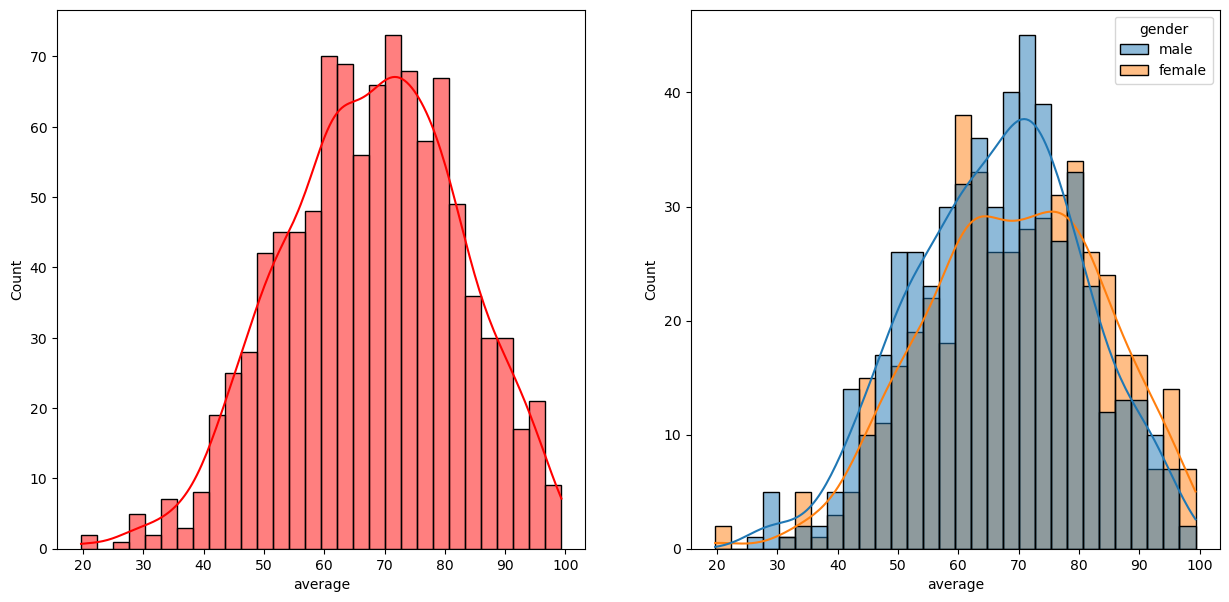

In [31]:
## Exploring More Visualization

fig,axis = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data = df, x='average',bins =30, kde= True, color ='r')
plt.subplot(122)
sns.histplot(data= df, x ='average', bins = 30, kde = True, hue='gender')

# Insights 

- Male student tend to perform well than Female students

<AxesSubplot: xlabel='average', ylabel='Count'>

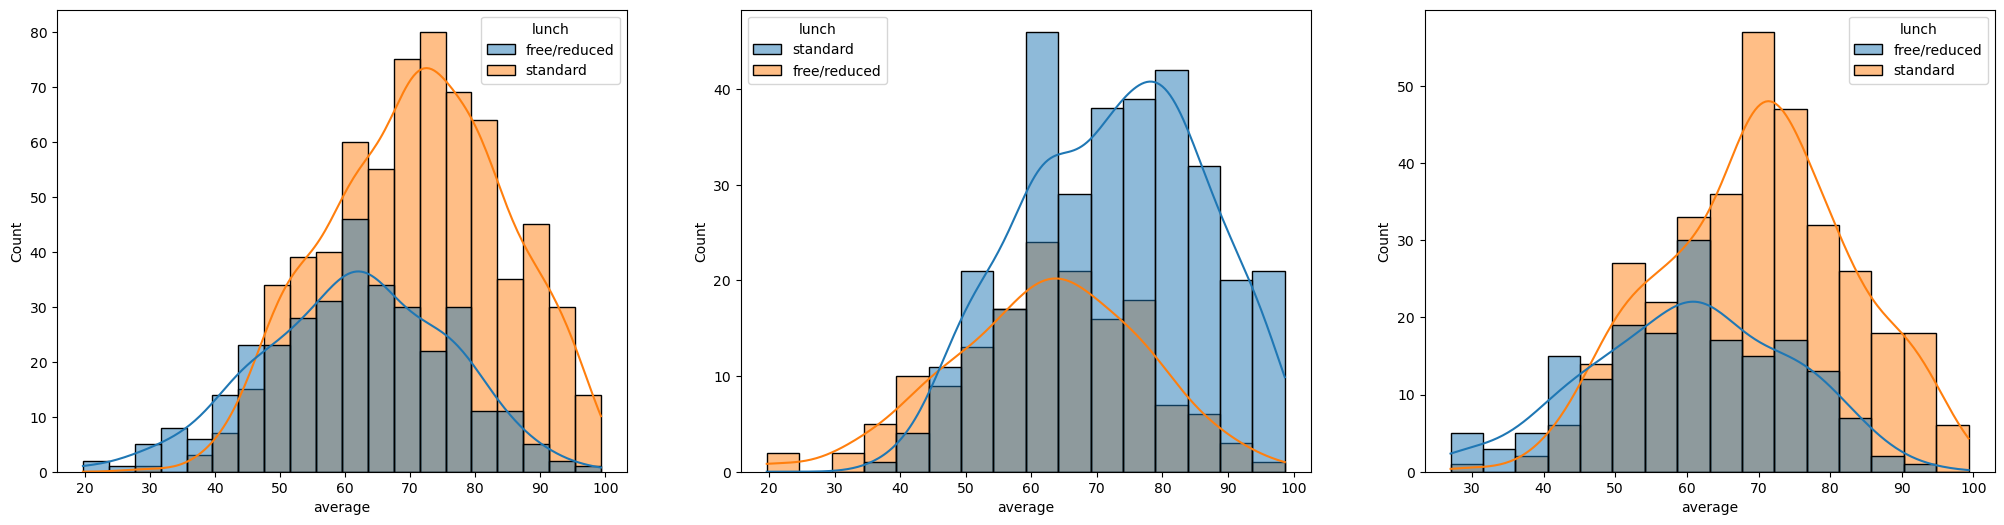

In [36]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender =='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender =='male'],x='average',kde=True,hue='lunch')

## Insights
- Standar Lunch help students perform well in exams
- Standard lunch helps perform well in exams be it a male or female

<AxesSubplot: xlabel='average', ylabel='Count'>

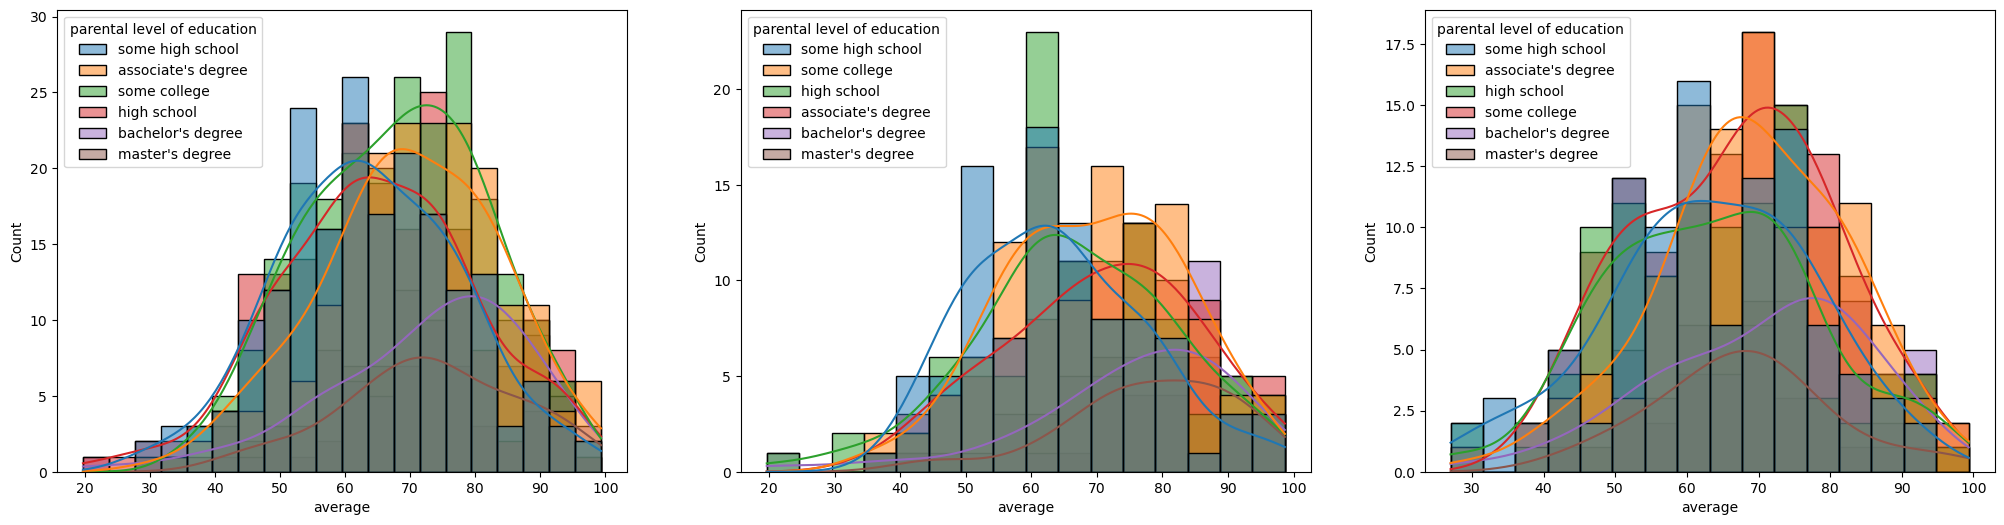

In [37]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(132)
sns.histplot(data=df[df.gender =='female'],x='average',kde=True,hue='parental level of education')
plt.subplot(133)
sns.histplot(data=df[df.gender =='male'],x='average',kde=True,hue='parental level of education')

# Insights
- In general parents eductaion dont help student perform well in exam
- 3rd plot shows that parents whose eductaion is of associate degree or masters degree their male child tend to perform well
- 2nd plot we can see there is no effect of parents education on female students.

<function matplotlib.pyplot.show(close=None, block=None)>

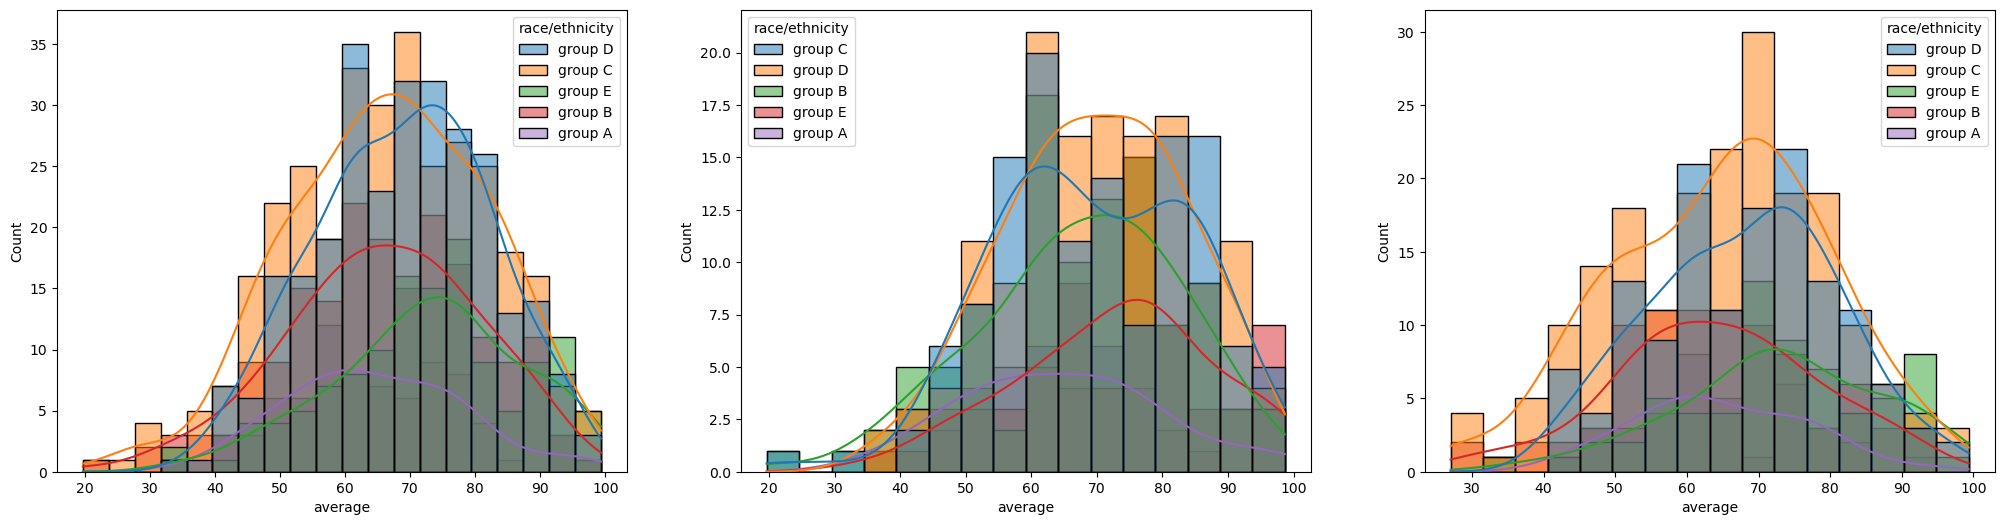

In [39]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender =='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender =='male'],x='average',kde=True,hue='race/ethnicity')
plt.show

# Insights
- Students of Group A and Group B tends to perform poorly in exams
- Students of Group A and Group B tends to perform poorly in exam irrespective of whether they are male or female

<AxesSubplot: >

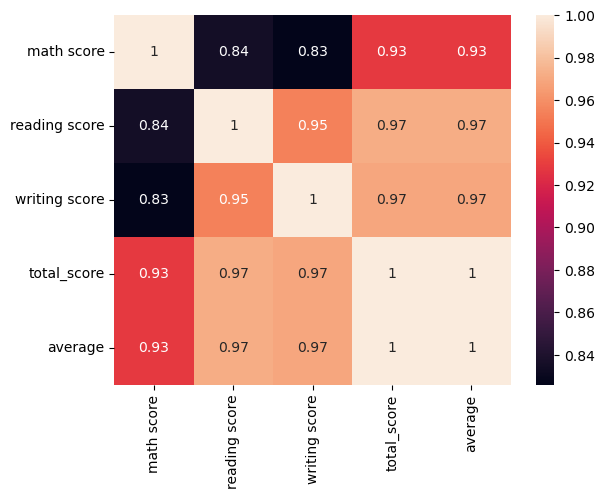

In [40]:
sns.heatmap(df.corr(),annot=True)